In [43]:
# ======================================
# 1. Data Exploration
# ======================================

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\Titanic_train.csv")

# Display first few rows
df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
# Dataset shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Data types and non-null counts
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Number of rows: 891
Number of columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Far

In [3]:
# Statistical summary for numerical columns
df.describe()

# Summary for categorical columns
df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


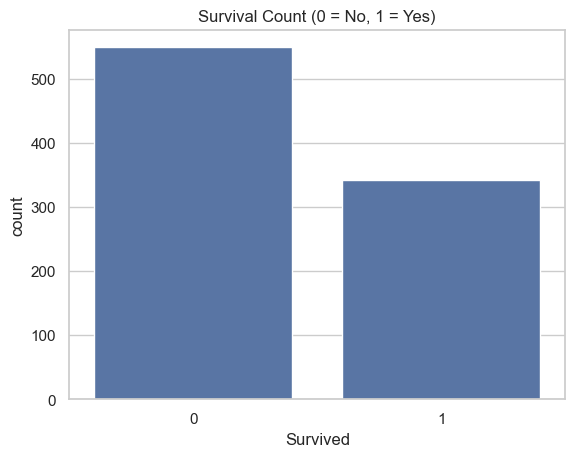

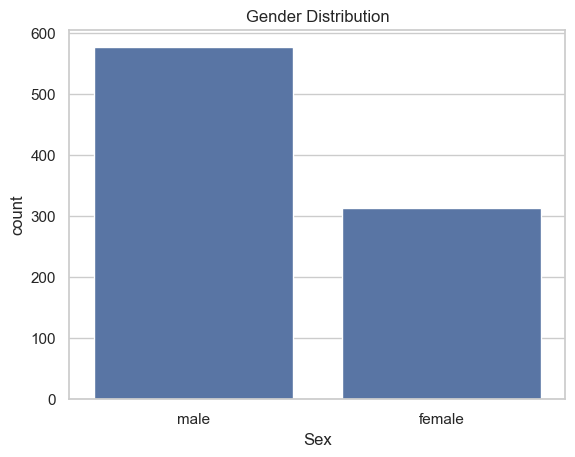

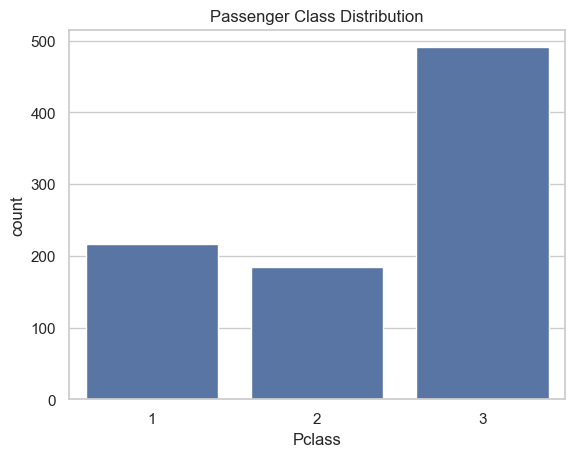

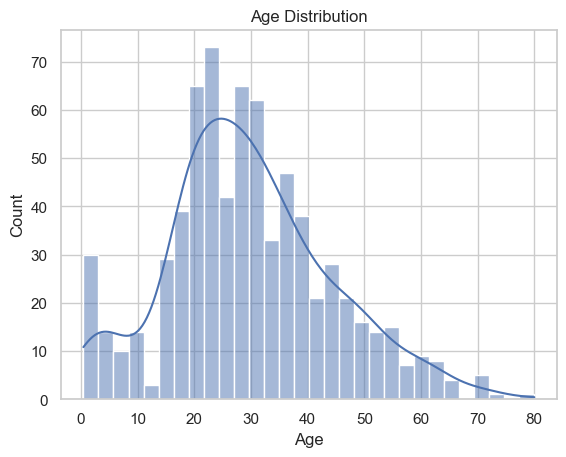

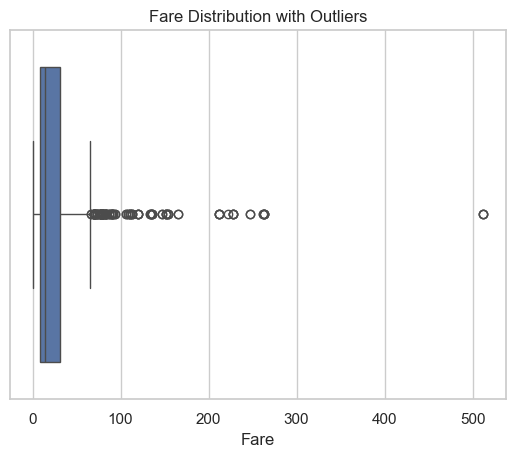

In [4]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

# Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()


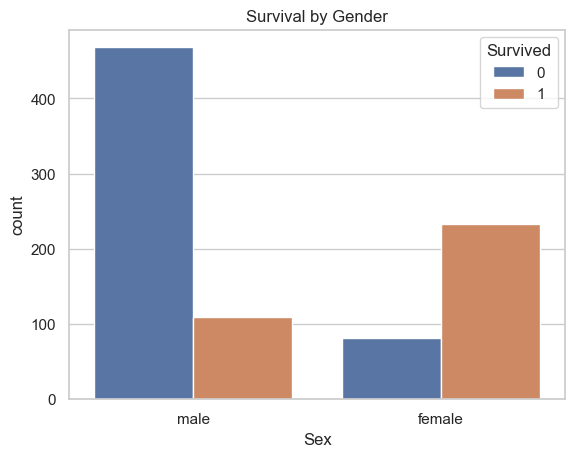

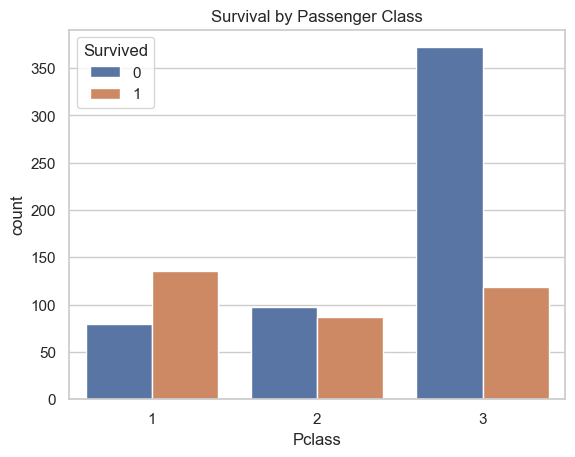

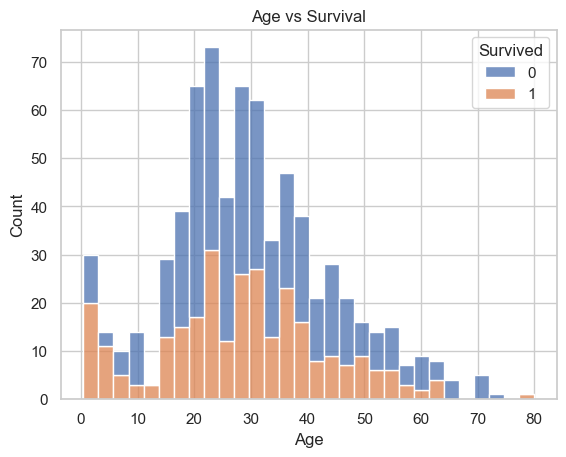

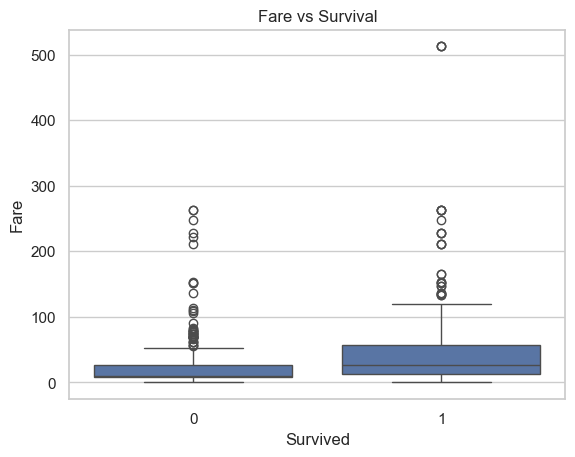

In [5]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age vs Survival")
plt.show()

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


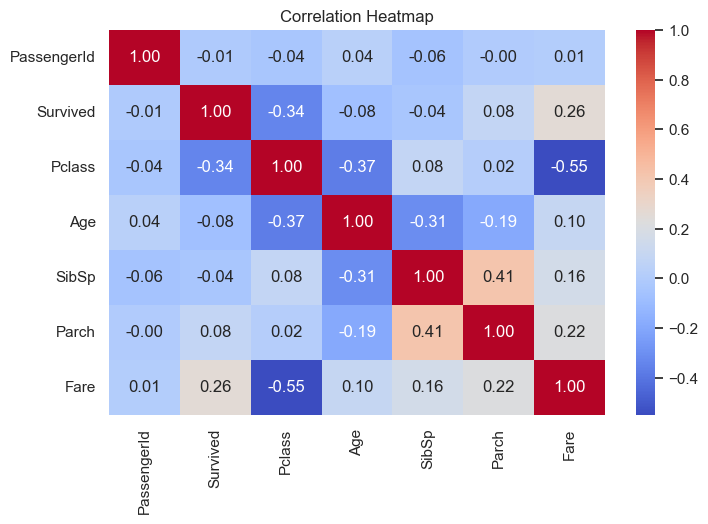

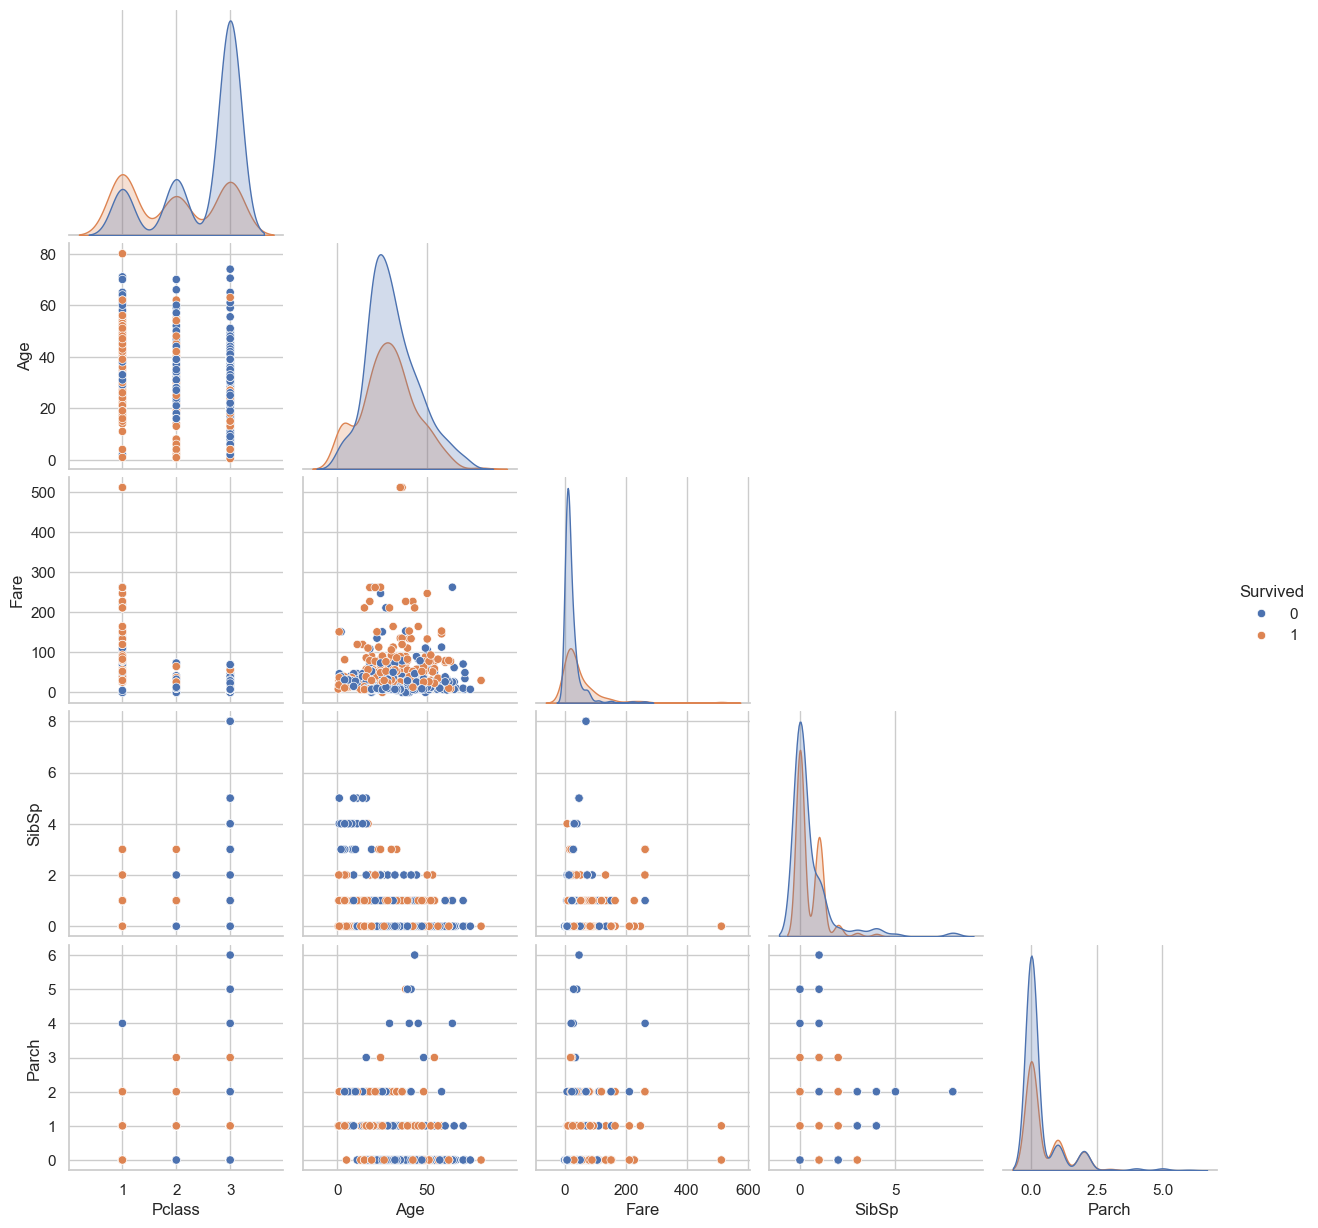

In [6]:
# Correlation matrix (numeric columns)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional — visualizes relationships between features)
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived', corner=True)
plt.show()


In [7]:
# ======================================
# 2. Data Preprocessing
# ======================================

# Copy the dataset to avoid modifying the original
data = df.copy()


In [8]:
# Check missing values
print("Missing values before handling:")
print(data.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Drop Cabin (too many missing)
data.drop('Cabin', axis=1, inplace=True)

# Fill Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify
print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_13492\2583299234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_13492\2583299234.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [10]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display dataset after encoding
data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [12]:
# Separate features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (712, 8)
Testing data shape: (179, 8)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Check scaled training data (as numpy array)
print("Scaled data sample:\n", X_train_scaled[:5])


Scaled data sample:
 [[-1.61413602  1.25364106 -0.47072241 -0.47934164 -0.07868358  0.7243102
  -0.30335547  0.59248936]
 [-0.40055118 -0.47728355 -0.47072241 -0.47934164 -0.37714494  0.7243102
  -0.30335547  0.59248936]
 [ 0.81303367  0.21508629 -0.47072241 -0.47934164 -0.47486697  0.7243102
  -0.30335547  0.59248936]
 [ 0.81303367 -0.24649361  0.37992316 -0.47934164 -0.47623026  0.7243102
  -0.30335547  0.59248936]
 [ 0.81303367 -1.78509326  2.93185988  2.04874166 -0.02524937 -1.38062393
  -0.30335547  0.59248936]]


In [16]:
# ======================================
# 3. Model Building
# ======================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train (fit) the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = model.predict(X_train_scaled)

# Check training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")


Training Accuracy: 0.8006


In [17]:
# Intercept (bias term)
print("Intercept (β₀):", model.intercept_)

# Coefficients for each feature
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
coefficients


Intercept (β₀): [-0.67524139]


,Feature,Coefficient
4,Fare,0.126511
6,Embarked_Q,-0.046058
3,Parch,-0.096142
7,Embarked_S,-0.189423
2,SibSp,-0.349952
1,Age,-0.396152
0,Pclass,-0.785328
5,Sex_male,-1.277104


In [18]:
# ======================================
# 4. Model Evaluation
# ======================================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Probabilities for ROC-AUC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


In [20]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


Model Performance Metrics:
Accuracy:  0.8101
Precision: 0.7857
Recall:    0.7432
F1 Score:  0.7639
ROC-AUC:   0.8820


In [21]:
# Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



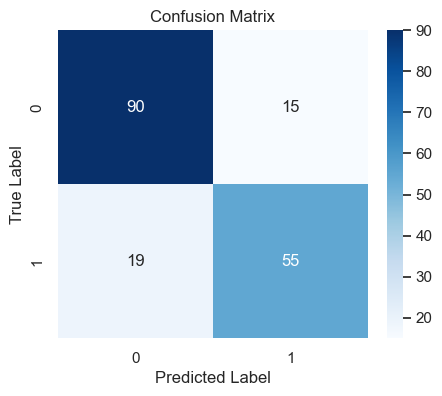

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


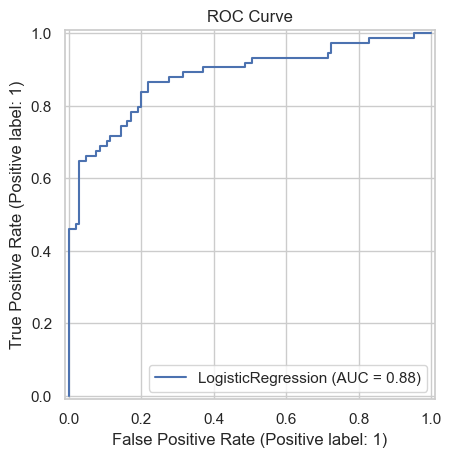

In [23]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


In [24]:
# ======================================
# 5. Model Interpretation
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Create a DataFrame for feature importance
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficients
coeff_df['abs_coeff'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False)

coeff_df


,Feature,Coefficient,abs_coeff
5,Sex_male,-1.277104,1.277104
0,Pclass,-0.785328,0.785328
1,Age,-0.396152,0.396152
2,SibSp,-0.349952,0.349952
7,Embarked_S,-0.189423,0.189423
4,Fare,0.126511,0.126511
3,Parch,-0.096142,0.096142
6,Embarked_Q,-0.046058,0.046058


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_13492\802693827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')


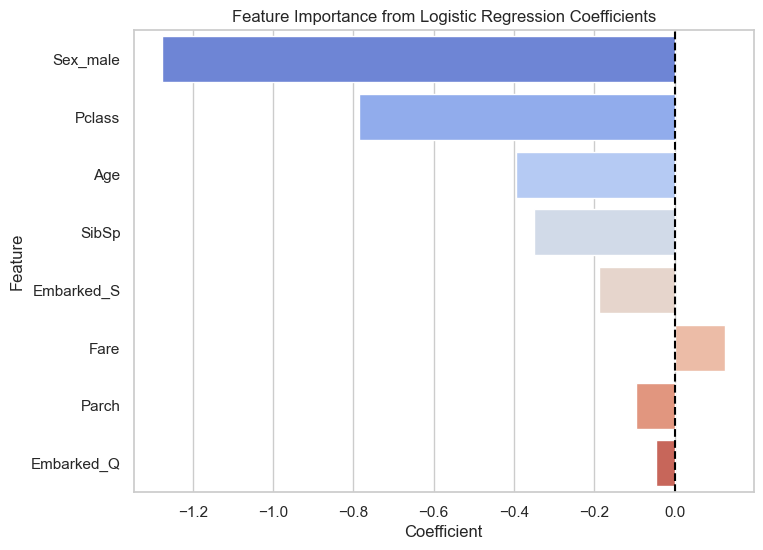

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [27]:
# Predict survival probability for the first passenger in test set
example = X_test_scaled[0].reshape(1, -1)
pred_prob = model.predict_proba(example)[0][1]
print(f"Predicted Survival Probability: {pred_prob:.2f}")


Predicted Survival Probability: 0.11
